# Screening based on pe ratio relative to sector and industry for S&P500

We scrape tickers of S&P500 companies from wikipedia, then we compare which companies have the lowest pe ratio relative to their industry and sector. We get the pe ratio from yahoo finance. The results are then displayed with histograms.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np


In [2]:
URL = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

In [ ]:
tables = pd.read_html(URL)

sp500_Symbols = list(tables[0]["Symbol"]) 
#these two companies were only listed as their b stock
#sp500_Symbols.append("BF")
#sp500_Symbols.append("BRK")

In [4]:
data = pd.DataFrame(columns=('symbol', 'industry', 'sector', 'pe'))

for i in range(len(sp500_Symbols)):
    symb = sp500_Symbols[i]
    stock = yf.Ticker(symb)
    info = stock.get_info()
    try:
        data.loc[i] = [symb,info["industry"],  info["sector"] ,info["forwardPE"]]
    except:
        print("-----------------------------------------------------------------------------")
        print("error occured with data related to " + symb)
        try:
            info["industry"]
        except:
            print("industry not found")
        try:
            info["sector"]
        except:
            print("sector not found")
        try:
            info["forwardPE"]
        except:
            print("forwardPE not found")
        
    

-----------------------------------------------------------------------------
error occured with data related to BRK.B
industry not found
sector not found
forwardPE not found
-----------------------------------------------------------------------------
error occured with data related to BF.B
industry not found
sector not found
forwardPE not found
-----------------------------------------------------------------------------
error occured with data related to BF
industry not found
sector not found
forwardPE not found
-----------------------------------------------------------------------------
error occured with data related to BRK
industry not found
sector not found
forwardPE not found


In [5]:
# drop companies with negative pe ratio
print(f"Num Companies befor filter...... {len(data)}")

df_filtered = data[data['pe'] > 0]

print(f"Num Companies after filter...... {len(df_filtered)}")

Num Companies befor filter...... 501
Num Companies after filter...... 499


In [69]:
data_grouped_by_industry = [group.reset_index() for _, group in df_filtered.groupby('industry')]

In [70]:
data_grouped_by_industry[6]

,index,symbol,industry,sector,pe
0,30,AMP,Asset Management,Financial Services,13.316076
1,37,APO,Asset Management,Financial Services,16.534788
2,63,BLK,Asset Management,Financial Services,23.565989
3,64,BX,Asset Management,Financial Services,29.845627
4,204,BEN,Asset Management,Financial Services,9.855769
5,256,IVZ,Asset Management,Financial Services,11.235450
6,275,KKR,Asset Management,Financial Services,24.069193
7,341,NTRS,Asset Management,Financial Services,16.742147
8,377,PFG,Asset Management,Financial Services,9.227488
9,390,RJF,Asset Management,Financial Services,14.747755


In [71]:
mean_sd_pe_per_industry = []
companies_under_std = []
for i in range(len(data_grouped_by_industry)):
    pe_industry = data_grouped_by_industry[i]["pe"]
    mean =  (np.mean(pe_industry).item())
    std  = np.std(pe_industry).item()
    mean_sd_pe_per_industry.append((mean, std))
    # get all companies which are at leas one standard deviation under the mean of the industry:
    threshold = mean - std
    companies_under_std.append(data_grouped_by_industry[i][data_grouped_by_industry[i]["pe"] < threshold])

In [72]:
companies_under_std = [df  for df in companies_under_std]
filtered_companies_under_std = []
for df in companies_under_std:
    if not df.empty:
        filtered_companies_under_std.append(df)


In [84]:
relevantIndustries = []
print("Found companies with low industry pe in the following industries:")
for df in filtered_companies_under_std:
    industry = df.reset_index().loc[0]["industry"]
    print(industry)
    relevantIndustries.append(industry)

Found companies with low industry pe in the following industries:
Apparel Retail
Asset Management
Auto Parts
Banks - Diversified
Banks - Regional
Biotechnology
Building Products & Equipment
Capital Markets
Communication Equipment
Computer Hardware
Consulting Services
Credit Services
Discount Stores
Drug Manufacturers - General
Entertainment
Farm & Heavy Construction Machinery
Farm Products
Healthcare Plans
Information Technology Services
Insurance Brokers
Integrated Freight & Logistics
Internet Content & Information
Medical Care Facilities
Medical Devices
Medical Distribution
Oil & Gas E&P
Oil & Gas Midstream
Oil & Gas Refining & Marketing
Packaging & Containers
REIT - Industrial
REIT - Retail
Railroads
Real Estate Services
Resorts & Casinos
Restaurants
Scientific & Technical Instruments
Semiconductor Equipment & Materials
Semiconductors
Software - Application
Specialty Business Services
Specialty Chemicals
Specialty Retail
Steel
Tobacco
Tools & Accessories
Travel Services
Utilities - 

## Select Your prefered Industry:

In [125]:
industry = "Scientific & Technical Instruments"

In [126]:
idx_industry = 0
for i in range(len(data_grouped_by_industry)):
    if industry == data_grouped_by_industry[i].reset_index().loc[0]["industry"]:
        idx_industry = i
        break
else:
    print("industry not found. please check if you selected a valid industry")

In [127]:
companiesToPlot = data_grouped_by_industry[idx_industry]

<Figure size 640x480 with 0 Axes>

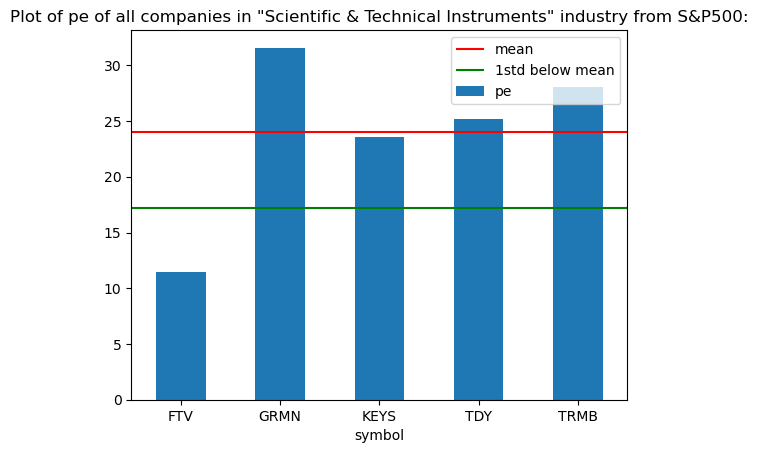

In [128]:
plt.clf()
ax = companiesToPlot.plot.bar(x='symbol', y='pe', rot=0)
plt.hlines(mean_sd_pe_per_industry[idx_industry][0], xmax=10, xmin=-10, colors="r", label= "mean")
plt.hlines(mean_sd_pe_per_industry[idx_industry][0] - mean_sd_pe_per_industry[idx_industry][1], xmax=10, xmin=-10, colors="g", label= "1std below mean")
plt.title(f'Plot of pe of all companies in "{industry}" industry from S&P500:')
plt.legend()
plt.show()